# Energy Based Generative Model -- Maximum Entropy

In [1]:
%load_ext autoreload
%autoreload 2

## Classifier on MNIST Dataset
example from [keras documentation](https://keras.io/examples/mnist_cnn/)

In [114]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Reshape
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# load mnist data set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten input (for maxent search)
X_train = X_train.reshape(X_train.shape[0], img_rows * img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows * img_cols)

# input shape for conv2d model
if K.image_data_format() == 'channels_first':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)

# Normalizing data
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255.0
X_test /= 255.0

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model = Sequential()
model.add(Reshape(input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

X_train shape: (60000, 784)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 35s 584us/step - loss: 0.2764 - acc: 0.9151 - val_loss: 0.0598 - val_acc: 0.9809
Epoch 2/12
60000/60000 [==============================] - 34s 567us/step - loss: 0.0913 - acc: 0.9730 - val_loss: 0.0400 - val_acc: 0.9869
Epoch 3/12
60000/60000 [==============================] - 34s 568us/step - loss: 0.0660 - acc: 0.9801 - val_loss: 0.0352 - val_acc: 0.9885
Epoch 4/12
60000/60000 [==============================] - 34s 566us/step - loss: 0.0561 - acc: 0.9833 - val_loss: 0.0355 - val_acc: 0.9879
Epoch 5/12
60000/60000 [==============================] - 34s 570us/step - loss: 0.0492 - acc: 0.9851 - val_loss: 0.0325 - val_acc: 0.9887
Epoch 6/12
60000/60000 [==============================] - 34s 566us/step - loss: 0.0417 - acc: 0.9874 - val_loss: 0.0321 - val_acc: 0.9901
Epoch 7/12
60000/60000 [=========================

In [116]:
model.save('dat/mnist_cnn.hdf5')

## Generative Model
- feature function: $\langle x_i \rangle$ and $\langle x_i x_j\rangle$
- learn weights: $\lambda_i$ and $\lambda_{ij}$ for nearest neighbours

In [218]:
%cd gempy/mnist

/home/bhartl/projects/generative-models/gempy/mnist


In [224]:
from gempy.mnist import MnistGenerator
import matplotlib.pyplot as plt
import numpy as np


kwargs = dict(    
    maxsteps=3000, 
    batch_size=16, 
    n_sweeps=1, 
    learning_rate=1e-2, 
    save_fig=10, 
    reg_l2=0.07, 
)

### Fit number `0`

*** train on 6903 `0`s in the mnist dataset ***
*** start fitting maxent model ***
step: 3000/3000, drawn samples: 16 (0.166), loss: 17.969
** dumped results to `dat/mnist_0/number_0.yml` ***
** done after 6100.569390535355 seconds ***


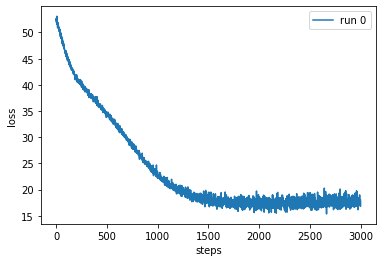

In [220]:
mnist_zero = MnistGenerator.main(train_on=0, export_path='dat/mnist_0', **kwargs)

### Fit number `1`

*** train on 7877 `1`s in the mnist dataset ***
*** start fitting maxent model ***
step: 3000/3000, drawn samples: 16 (0.052), loss: 11.861
** dumped results to `dat/mnist_1/number_1.yml` ***
** done after 680.0724084377289 seconds ***


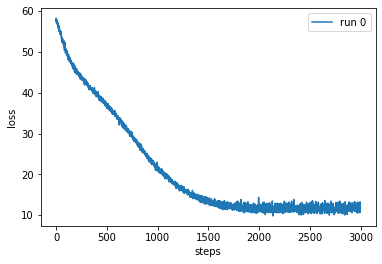

In [225]:
mnist_one = MnistGenerator.main(train_on=1, export_path='dat/mnist_1', **kwargs)

### Fit number `2`

*** train on 6990 `2`s in the mnist dataset ***
*** start fitting maxent model ***
step: 3000/3000, drawn samples: 16 (0.124), loss: 16.142
** dumped results to `dat/mnist_2/number_2.yml` ***
** done after 678.8364677429199 seconds ***


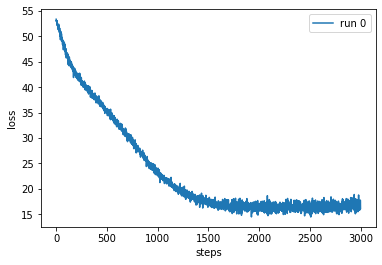

In [226]:
mnist_two = MnistGenerator.main(train_on=2, export_path='dat/mnist_2', **kwargs)

### Fit number `3`

*** train on 7141 `3`s in the mnist dataset ***
*** start fitting maxent model ***
step: 3000/3000, drawn samples: 16 (0.128), loss: 15.115
** dumped results to `dat/mnist_3/number_3.yml` ***
** done after 677.5975224971771 seconds ***


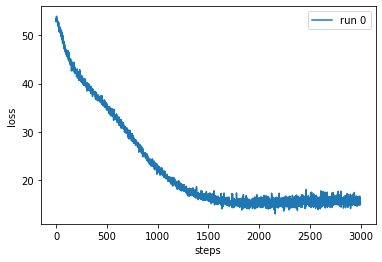

In [227]:
mnist_three = MnistGenerator.main(train_on=3, export_path='dat/mnist_3', **kwargs)

### Fit number `4`

*** train on 6824 `4`s in the mnist dataset ***
*** start fitting maxent model ***
step: 3000/3000, drawn samples: 16 (0.088), loss: 14.853
** dumped results to `dat/mnist_4/number_4.yml` ***
** done after 677.5665628910065 seconds ***


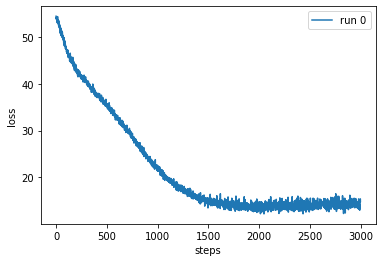

In [228]:
mnist_four = MnistGenerator.main(train_on=4, export_path='dat/mnist_4', **kwargs)

### Fit number `5`

*** train on 6313 `5`s in the mnist dataset ***
*** start fitting maxent model ***
step: 3000/3000, drawn samples: 16 (0.088), loss: 14.924
** dumped results to `dat/mnist_5/number_5.yml` ***
** done after 678.4525814056396 seconds ***


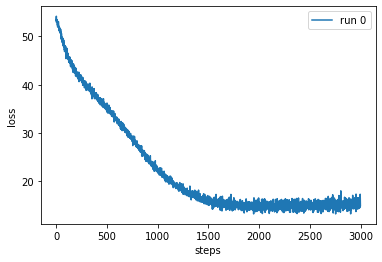

In [229]:
mnist_five = MnistGenerator.main(train_on=5, export_path='dat/mnist_5', **kwargs)

### Fit number `6`

*** train on 6876 `6`s in the mnist dataset ***
*** start fitting maxent model ***
step: 3000/3000, drawn samples: 16 (0.111), loss: 15.404
** dumped results to `dat/mnist_6/number_6.yml` ***
** done after 677.8753125667572 seconds ***


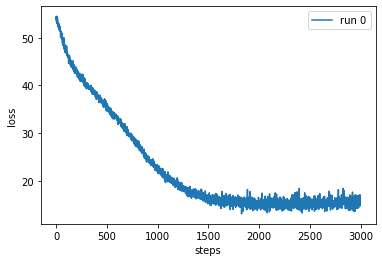

In [230]:
mnist_six = MnistGenerator.main(train_on=6, export_path='dat/mnist_6', **kwargs)

### Fit number `7`

*** train on 7293 `7`s in the mnist dataset ***
*** start fitting maxent model ***
step: 3000/3000, drawn samples: 16 (0.101), loss: 13.997
** dumped results to `dat/mnist_7/number_7.yml` ***
** done after 678.0368647575378 seconds ***


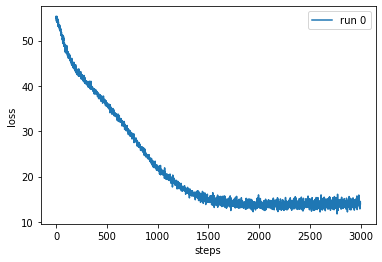

In [231]:
mnist_seven = MnistGenerator.main(train_on=7, export_path='dat/mnist_7', **kwargs)

### Fit number `8`

*** train on 6825 `8`s in the mnist dataset ***
*** start fitting maxent model ***
step: 3000/3000, drawn samples: 16 (0.134), loss: 15.801
** dumped results to `dat/mnist_8/number_8.yml` ***
** done after 677.2326283454895 seconds ***


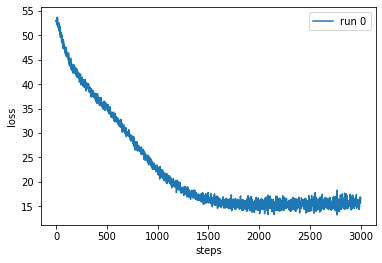

In [232]:
mnist_eight = MnistGenerator.main(train_on=8, export_path='dat/mnist_8', **kwargs)

### Fit number `9`

*** train on 6958 `9`s in the mnist dataset ***
*** start fitting maxent model ***
step: 3000/3000, drawn samples: 16 (0.115), loss: 13.798
** dumped results to `dat/mnist_9/number_9.yml` ***
** done after 677.8675436973572 seconds ***


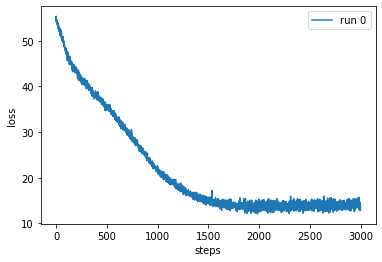

In [233]:
mnist_nine = MnistGenerator.main(train_on=9, export_path='dat/mnist_9', **kwargs)

### Generate numbers from generative models

In [261]:
def draw_number(n, n_sweeps=100, beta=1.):
    """split number into seperate figures (0 to 9) and generate 28x28 pixel images using the above trained MaxEnt models
    :n: number (str or int) which should be generated
    :param n_sweeps: number of initial sample sweeps (starting from random image)
    :param beta: inverse temperature used in Metropolis-Hastings sampling to generate image from figure
    """
    s = str(n)
    
    sampler = [
        mnist_zero, mnist_one, mnist_two, mnist_three, mnist_four, 
        mnist_five, mnist_six, mnist_seven, mnist_eight, mnist_nine, 
    ]
    
    numbers = []
    for si in s:
        i = int(si)
        assert 0 <= i <= 9
        print("sample ", i)
        mnist_i = sampler[i]
        sample_i = mnist_i.sample(n_samples=1, n_sweeps=n_sweeps, beta=beta)
        
        try:
            print()
            print('model prediction: ', np.argmax(model.predict(.5*(sample_i.reshape((1,28*28)) + 1.))), '\n')
        except:
            pass
        
        numbers.append(sample_i[0].reshape((28, 28)))
    
    return np.concatenate(numbers, axis=1)

In [262]:
fantasy_number = draw_number("0123456789", n_sweeps=10, beta=1.)

sample  0
step: 3000/3000, drawn samples: 1 (0.320), loss: 17.969
min:  -0.9996226129967687

model prediction:  0 

sample  1
step: 3000/3000, drawn samples: 1 (0.240), loss: 11.861
min:  -0.9996433307073234

model prediction:  1 

sample  2
step: 3000/3000, drawn samples: 1 (0.289), loss: 16.142
min:  -0.9997326147643397

model prediction:  2 

sample  3
step: 3000/3000, drawn samples: 1 (0.296), loss: 15.115
min:  -0.9989456402857433

model prediction:  3 

sample  4
step: 3000/3000, drawn samples: 1 (0.263), loss: 14.853
min:  -0.99968327529863

model prediction:  4 

sample  5
step: 3000/3000, drawn samples: 1 (0.269), loss: 14.924
min:  -0.9999305494868305

model prediction:  5 

sample  6
step: 3000/3000, drawn samples: 1 (0.292), loss: 15.404
min:  -0.999991922964216

model prediction:  6 

sample  7
step: 3000/3000, drawn samples: 1 (0.261), loss: 13.997
min:  -0.9999926334661375

model prediction:  7 

sample  8
step: 3000/3000, drawn samples: 1 (0.306), loss: 15.801
min:  -0.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

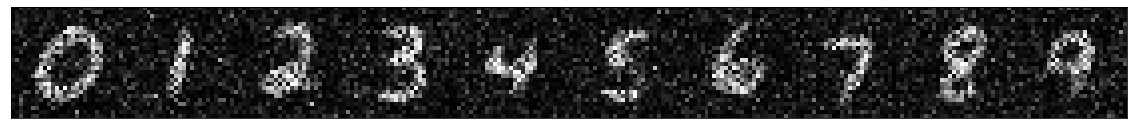

In [263]:
%matplotlib inline

plt.figure(figsize=(20, 5))
plt.imshow(fantasy_number, cmap='binary_r', vmin=-1., vmax=1)
plt.xticks([])
plt.yticks([])
plt.plot